# Milan Bansal 
# Roll no.  214102318

# Project

## Implementations -
### Part A. Exploratory Data Analysis (EDA)
### Part B. Applying Different Algorithms
### 1.) K-Nearest Neibours Algorithm (KNN)
### 2.) Decision Tree Classifier
### 3.) Logistic Regression
### 4.) Support Vector Machine (SVM)

In [1]:
# Importing packages
import numpy as np
from matplotlib import pyplot as plt
import random 
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.utils import resample
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scikitplot.estimators import plot_learning_curve
from IPython.display import Image


# Stroke-Dataset

In [2]:
stroke_data = pd.read_csv('stroke-data.csv') # reading the dataset
stroke_data.sample(15) # getting Sample of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
391,9637,Male,26.0,0,0,Yes,Private,Rural,120.31,22.3,smokes,0
5082,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
157,59437,Female,57.0,0,0,Yes,Private,Urban,221.89,37.3,smokes,1
4596,40323,Female,18.0,0,0,No,Private,Urban,70.89,19.8,never smoked,0
1853,70857,Female,55.0,0,0,Yes,Govt_job,Urban,198.36,29.1,smokes,0
4726,46015,Female,29.0,0,0,No,Private,Urban,73.63,22.5,smokes,0
3423,21762,Male,5.0,0,0,No,children,Rural,100.98,19.0,Unknown,0
4343,35210,Female,48.0,0,0,Yes,Private,Urban,112.96,25.4,never smoked,0
4801,57612,Male,62.0,0,0,Yes,Private,Urban,81.64,38.2,never smoked,0
3537,45112,Male,40.0,0,0,No,Govt_job,Urban,197.11,23.9,never smoked,0



## Context:
 <p style = 'text-align : left; color:black; font-size: 15px; font-family: "Arial"'><strong> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
</strong></p>

## Attribute Information:
<p style = 'text-align : left; color:black; font-size: 18px; font-family: "Aerial"'><strong> 
    
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
</strong></p>


### Cleaning the dataset

In [3]:
stroke_data.drop(['id'], axis = 1, inplace = True) # removing the 'id' column
stroke_data.describe() # description of the dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Handling missing values

In [4]:
stroke_data.isnull().sum() # getting number of missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Since number of missing values is very less as compared to number of samples, we can remove them
stroke_data.dropna(inplace = True) # removing null values

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>................................................................................................</strong></p>

 <p style = 'text-align : center; color:red; font-size: 30px; font-family: "times new roman"'><strong> Exploratory Data Analysis</strong></p>

In [6]:
df = pd.DataFrame({'Stroke: Yes':[1], 
                    'Stroke: No':[0]}, index = ['Label'])
display(df)

,Stroke: Yes,Stroke: No
Label,1,0


### Plots for class counts

,Stroke: No,Stroke: Yes
Count,209,4700


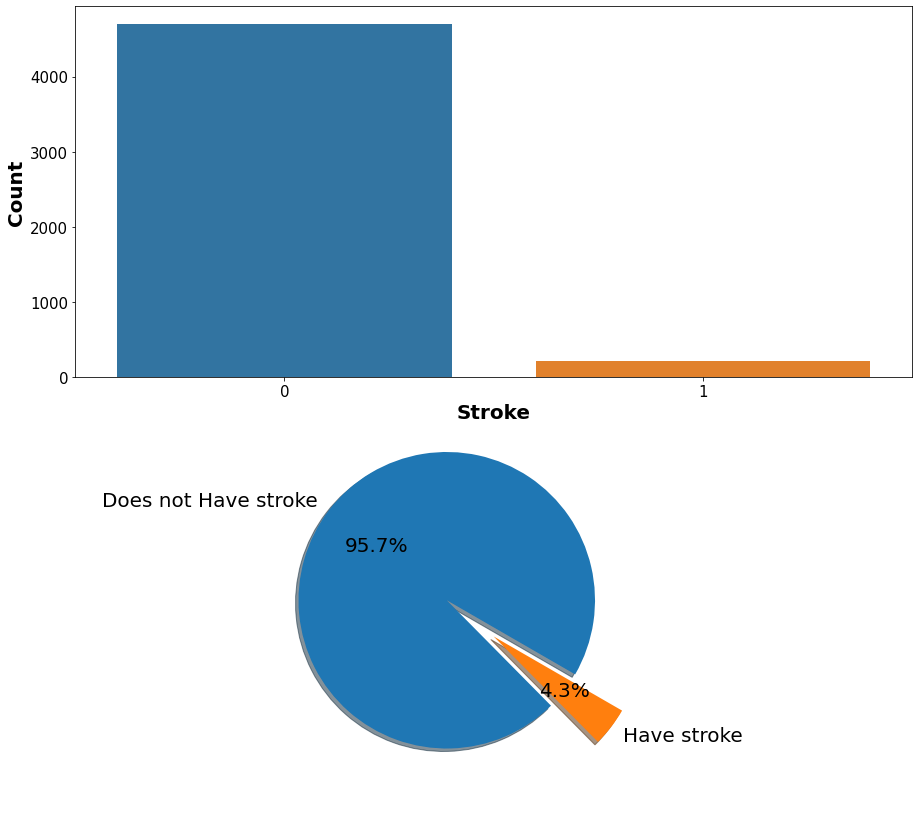

In [7]:
labels = ['Does not Have stroke', 'Have stroke']
counts = [stroke_data['stroke'].value_counts()[0], 
          stroke_data['stroke'].value_counts()[1]]

df_count = pd.DataFrame({'Stroke: No':counts[1],
                    'Stroke: Yes':counts[0]}, index = ['Count'])


fig1 = plt.figure(figsize = (15, 15))
ax1 = fig1.add_subplot(2,1,1)
sns.countplot(data = stroke_data, x = 'stroke')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Stroke', size = 20, weight = 'bold')
plt.ylabel('Count', size = 20, weight = 'bold')

ax2 = fig1.add_subplot(2,1,2)
ax2.pie(counts,explode = [0.4,0], labels = labels, autopct = '%1.1f%%', 
        shadow = True, startangle = -30, textprops = {'fontsize':20})
display(df_count)

In [8]:
cont = ['age', 'avg_glucose_level', 'bmi']
cat = [ 'gender', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'smoking_status']

conversions = {'Male':0, 'Female':1, 'Other':2, 
               'No':0, 'Yes':1, 
               'Private':0, 'children': 1, 'Govt_job':2, 'Never_worked':3, 'Self-employed':4,
               'Rural':0, 'Urban':1,
               'smokes':0, 'Unknown':1, 'never smoked':2, 'formerly smoked':3}


stroke_data.replace(conversions, inplace = True)
strokedf = stroke_data.copy()

### Histograms for continous variables

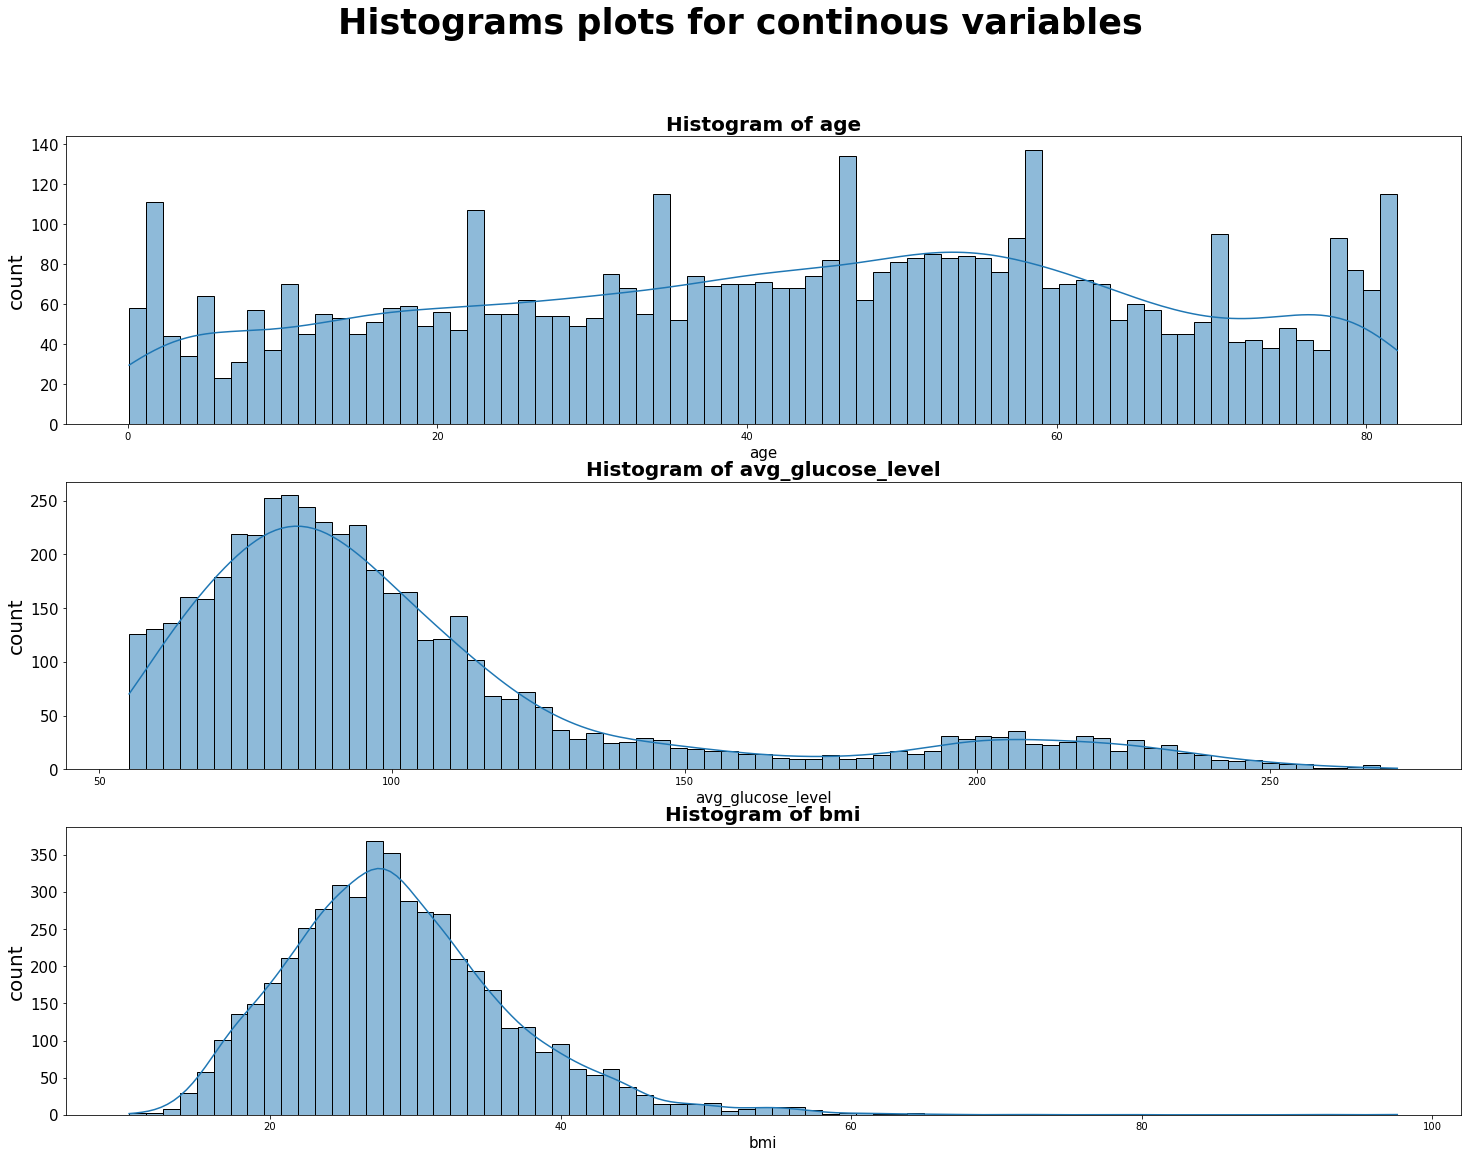

In [9]:
fig5 = plt.figure(figsize = (25,18))
fig5.suptitle('Histograms plots for continous variables', size = 35, weight = 'bold')

for i in range(len(cont)):
    fig5.add_subplot(len(cont), 1, i+1)
    plt.title(f'Histogram of {cont[i]}', weight = 'bold',size = 20)
    plt.xlabel(cont[i], size = 15)
    plt.ylabel('count', size = 20)
    plt.yticks(size = 15)
    sns.histplot(strokedf[cont[i]], bins = 75, kde = 50)


### Kernel Density Estimate plots for continous variables

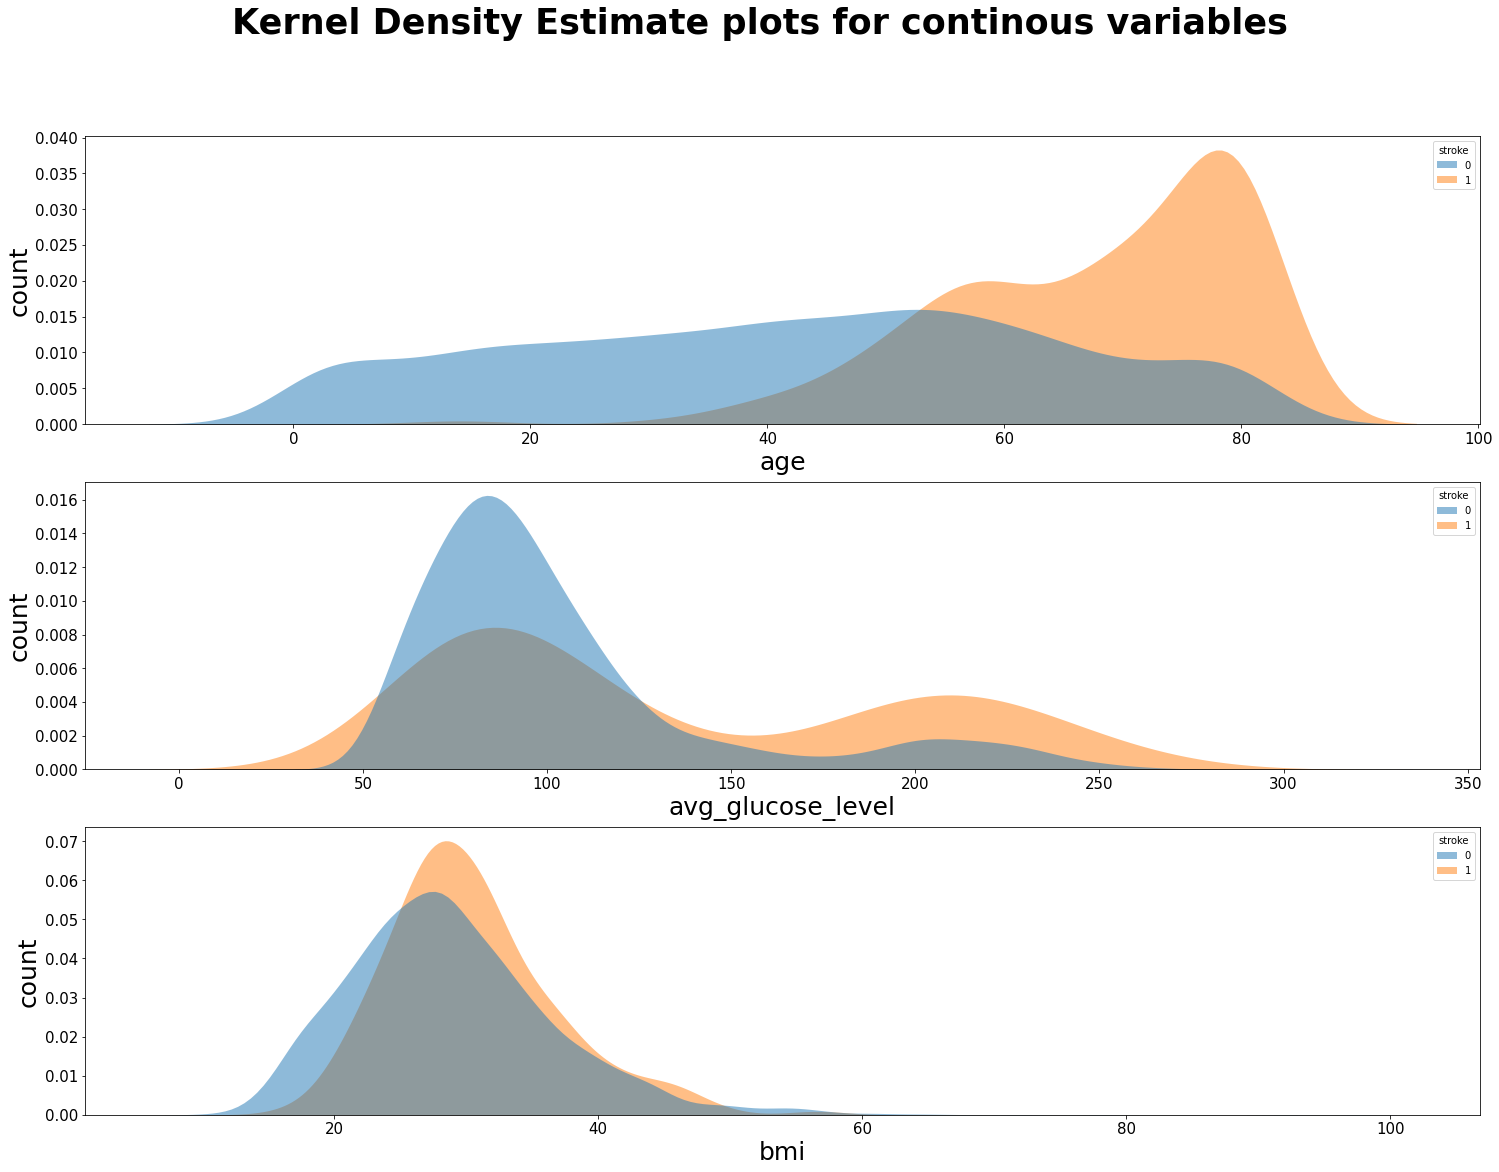

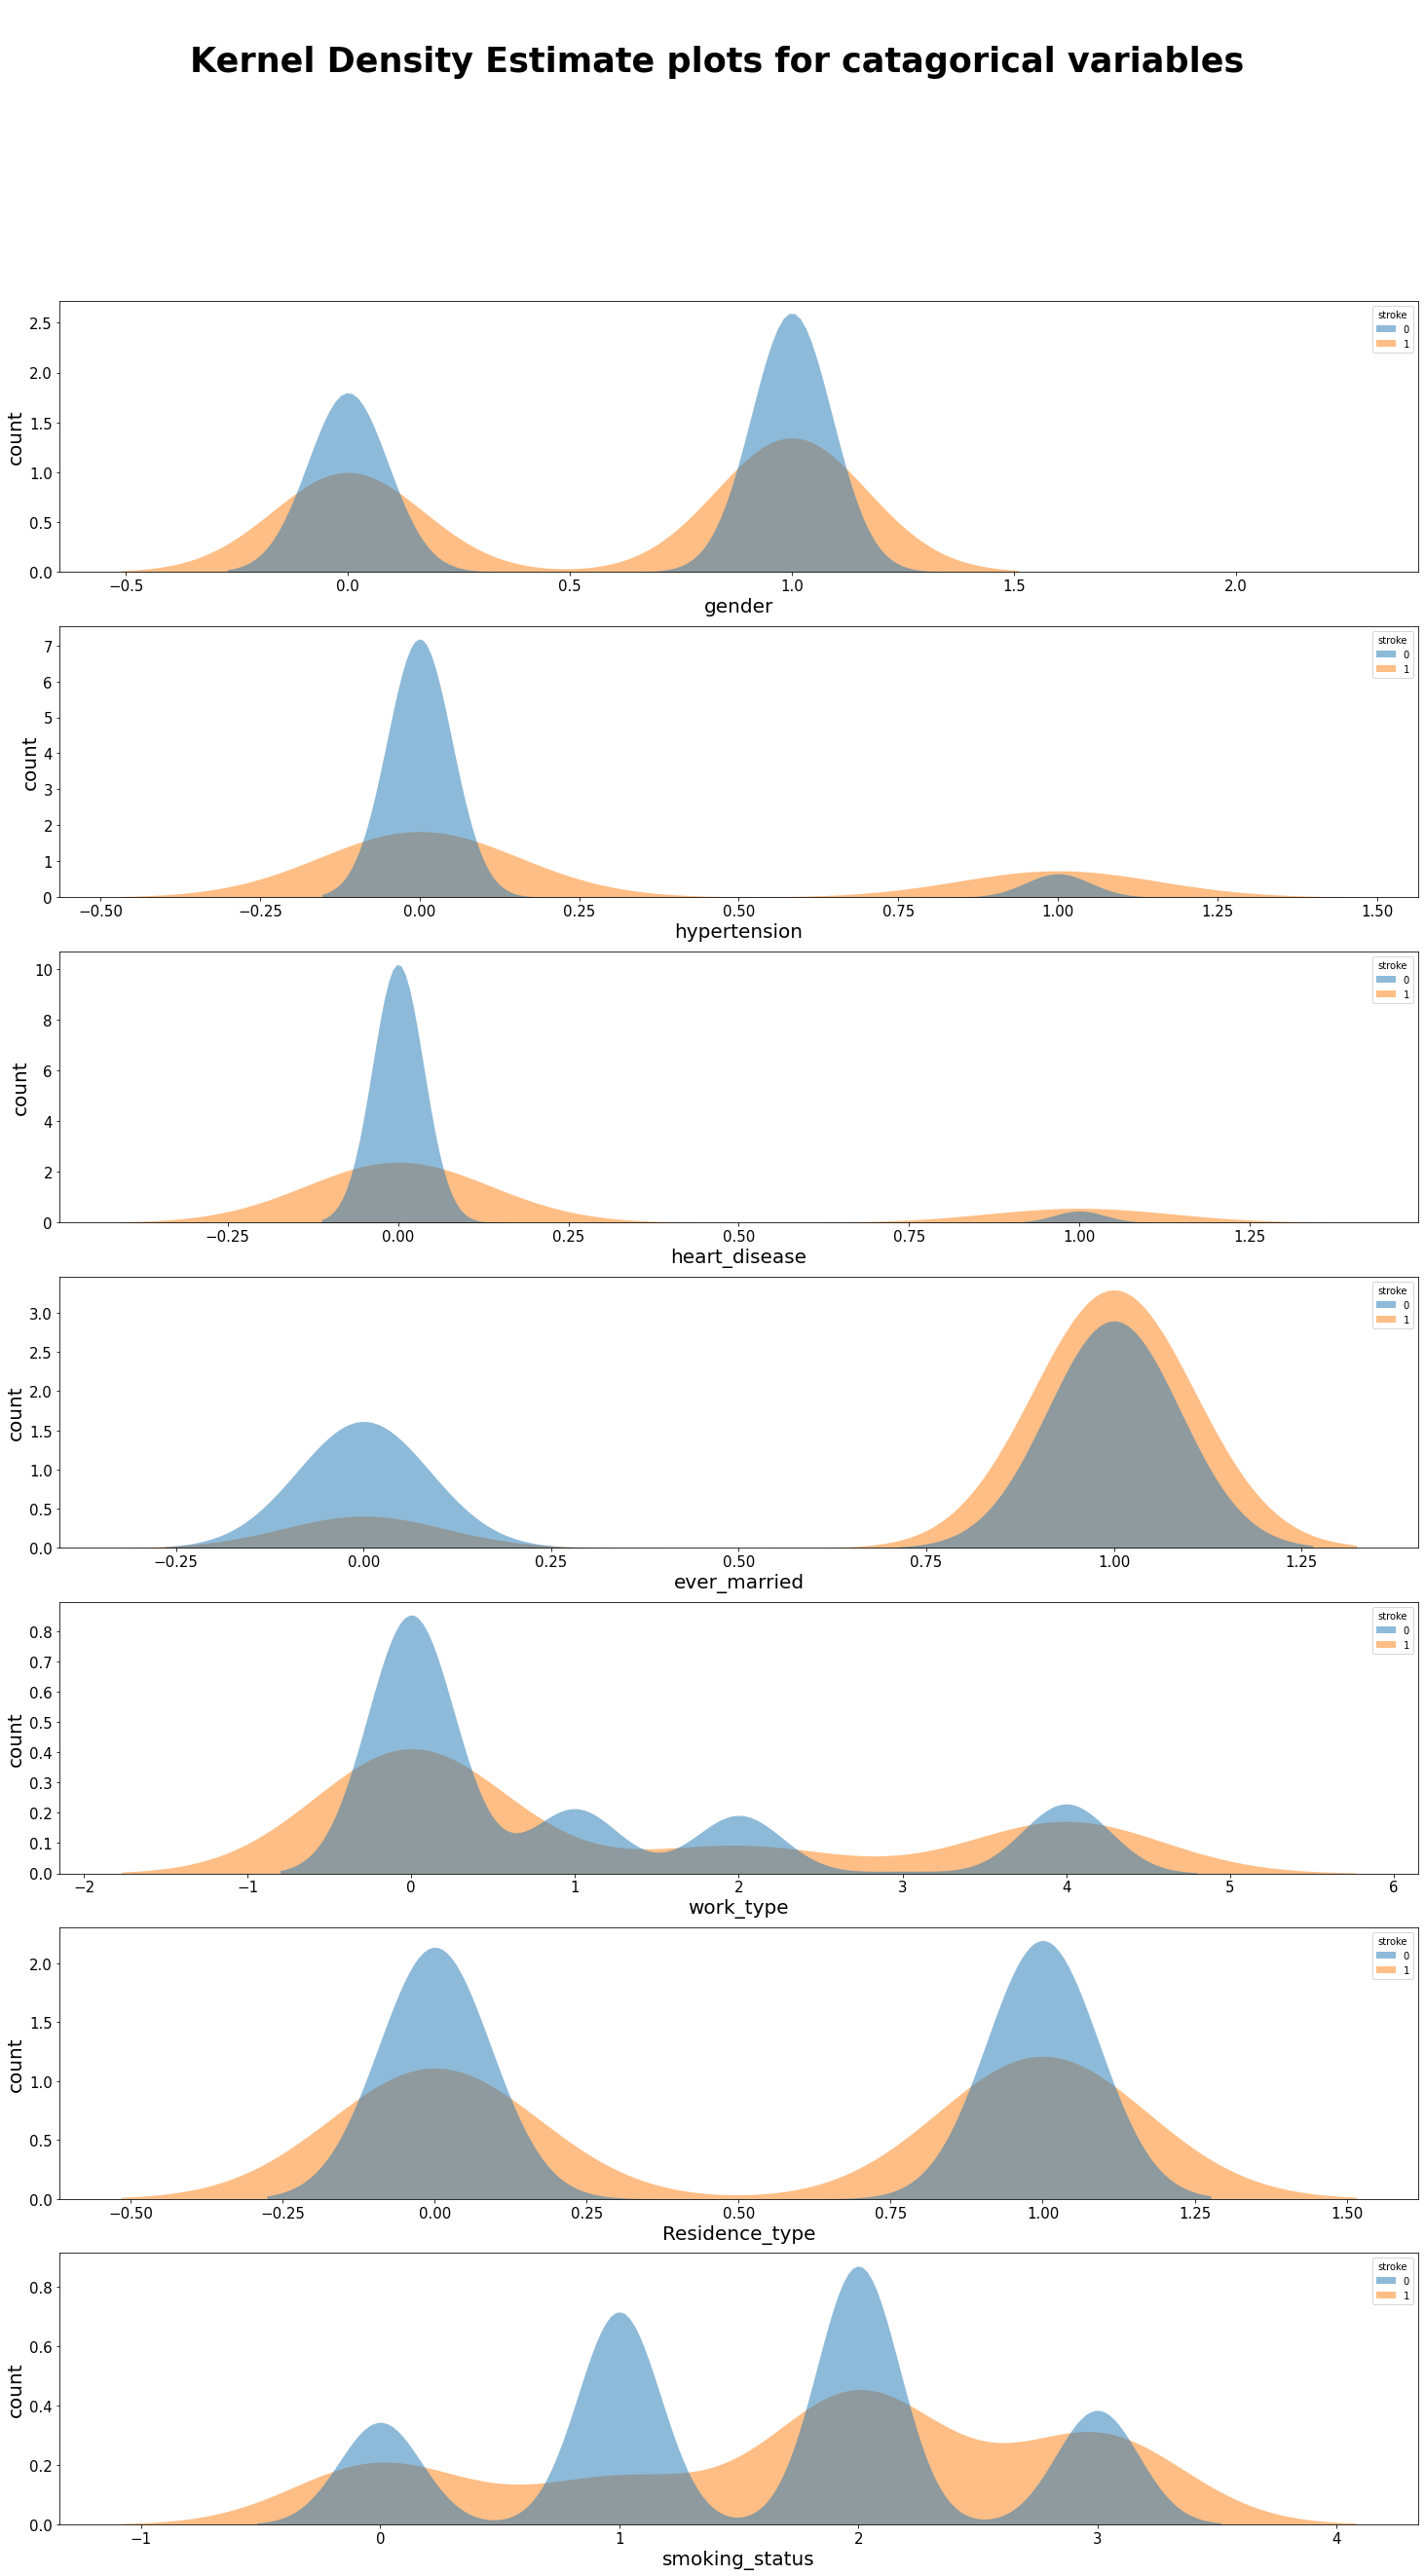

In [10]:
fig3 = plt.figure(figsize = (25,18))
fig3.suptitle('Kernel Density Estimate plots for continous variables', size = 35, weight = 'bold')
for i in range(len(cont)):
    fig3.add_subplot(len(cont),1,i+1)
    plt.xlabel(cont[i] ,size = 25)
    plt.ylabel('count',size = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    sns.kdeplot(data = strokedf, x = cont[i], hue = 'stroke', fill=True, common_norm=False, alpha=.5, linewidth=0)

fig4 = plt.figure(figsize = (25,42))
fig4.suptitle('\nKernel Density Estimate plots for catagorical variables', size = 35, weight = 'bold')

for j in range(len(cat)) :
    fig4.add_subplot(len(cat),1, j+1)
    plt.xlabel(cat[j], size = 20)
    plt.ylabel('count', size = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    sns.kdeplot(data = strokedf, x = cat[j], hue = 'stroke', fill=True, common_norm=False, alpha=.5, linewidth=0)

### Bar plots for Catagorical data

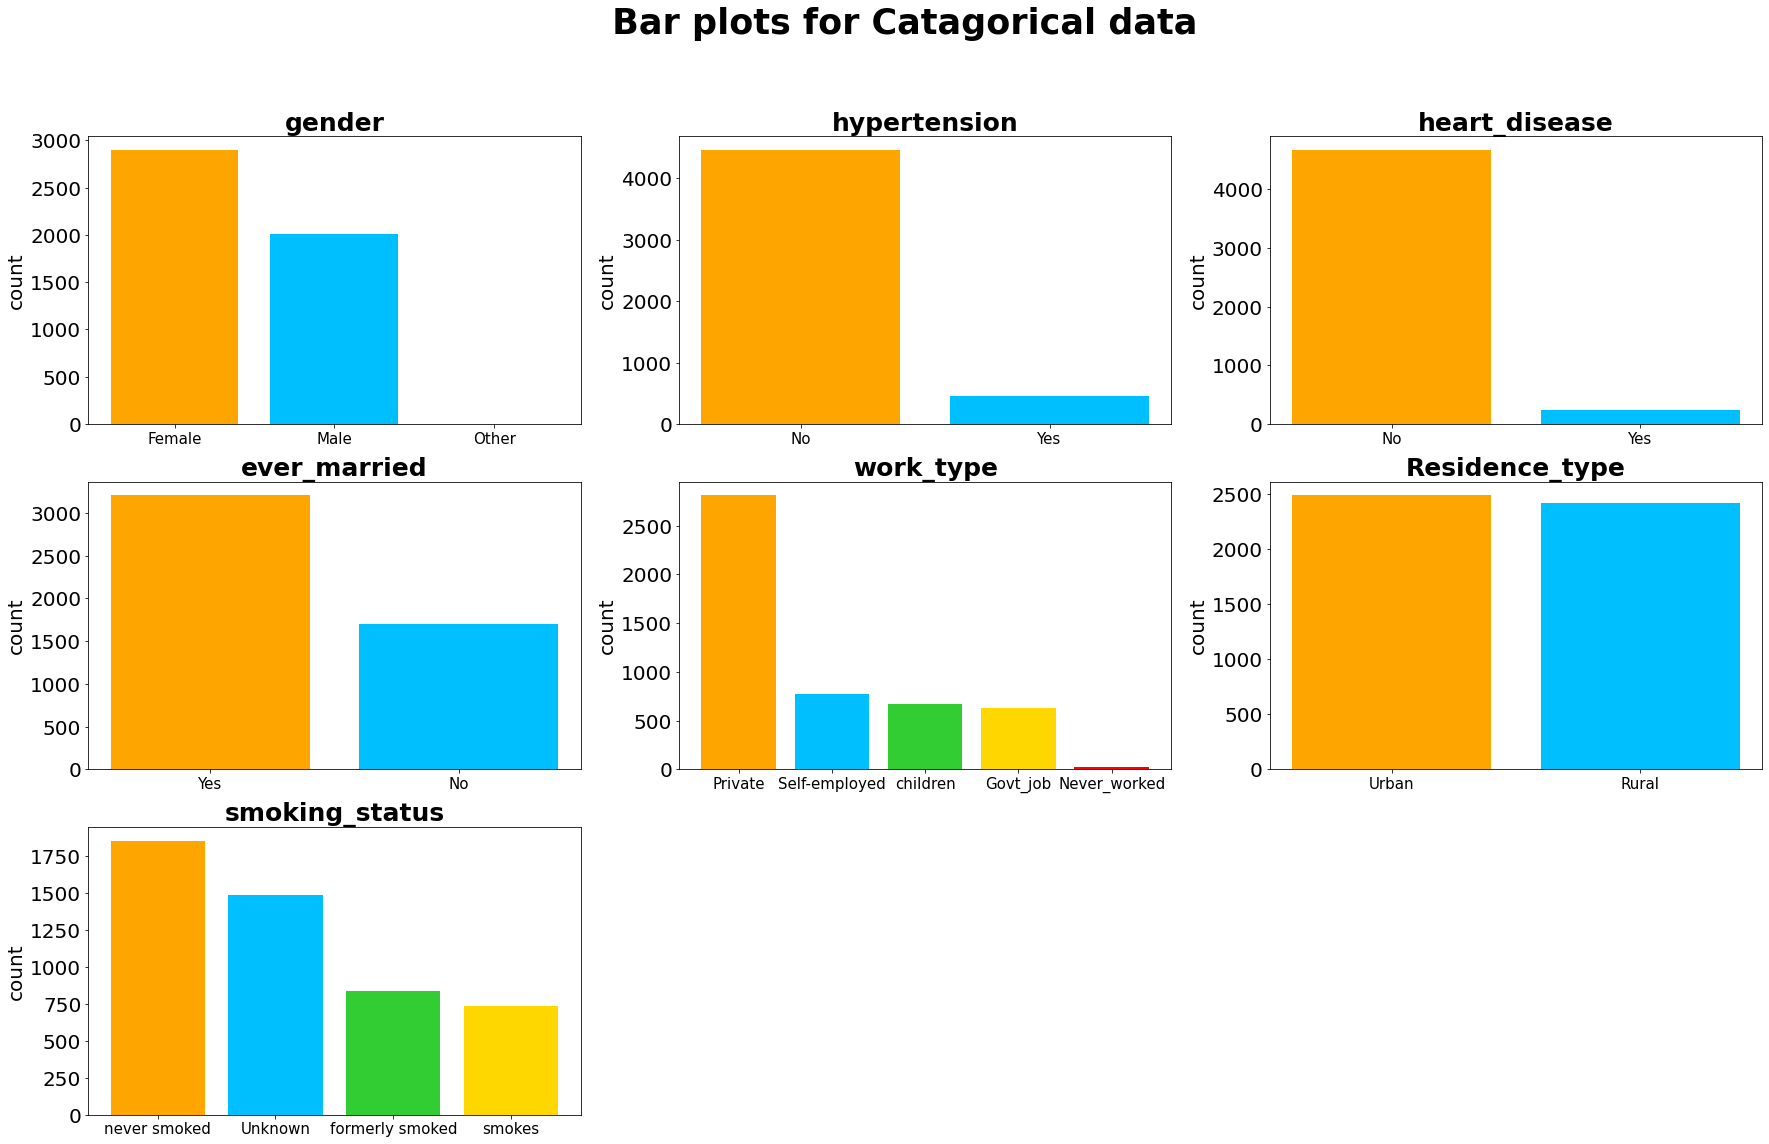

In [11]:
# X labels for plots
xlabs = {'gender': ['Male', 'Female', 'Other'],
          'hypertension':['No', 'Yes'],
         'heart_disease':['No', 'Yes'],
         'ever_married': ['No', 'Yes'],
         'work_type': ['Private', 'children', 'Govt_job', 'Never_worked', 'Self-employed' ],
         'Residence_type':['Rural','Urban'],
         'smoking_status':['smokes', 'Unknown', 'never smoked', 'formerly smoked']}

# Plotting the bar charts for catagorical data
fig2 = plt.figure(figsize=(30,18))
fig2.suptitle(' Bar plots for Catagorical data', size = 35, weight = 'bold')
for i in range(len(cat)):
    x_names = [xlabs[cat[i]][x] for x in strokedf[cat[i]].value_counts().index]
    y = strokedf[cat[i]].value_counts().values
    fig2.add_subplot(3,3,i+1)
    plt.title(cat[i],weight = 'bold',size = 25)
    plt.ylabel('count', size = 20)
    plt.bar(x_names, y, color = ['orange','deepskyblue','limegreen','gold','red'] )
    plt.xticks(size = 15)
    plt.yticks(size = 20)

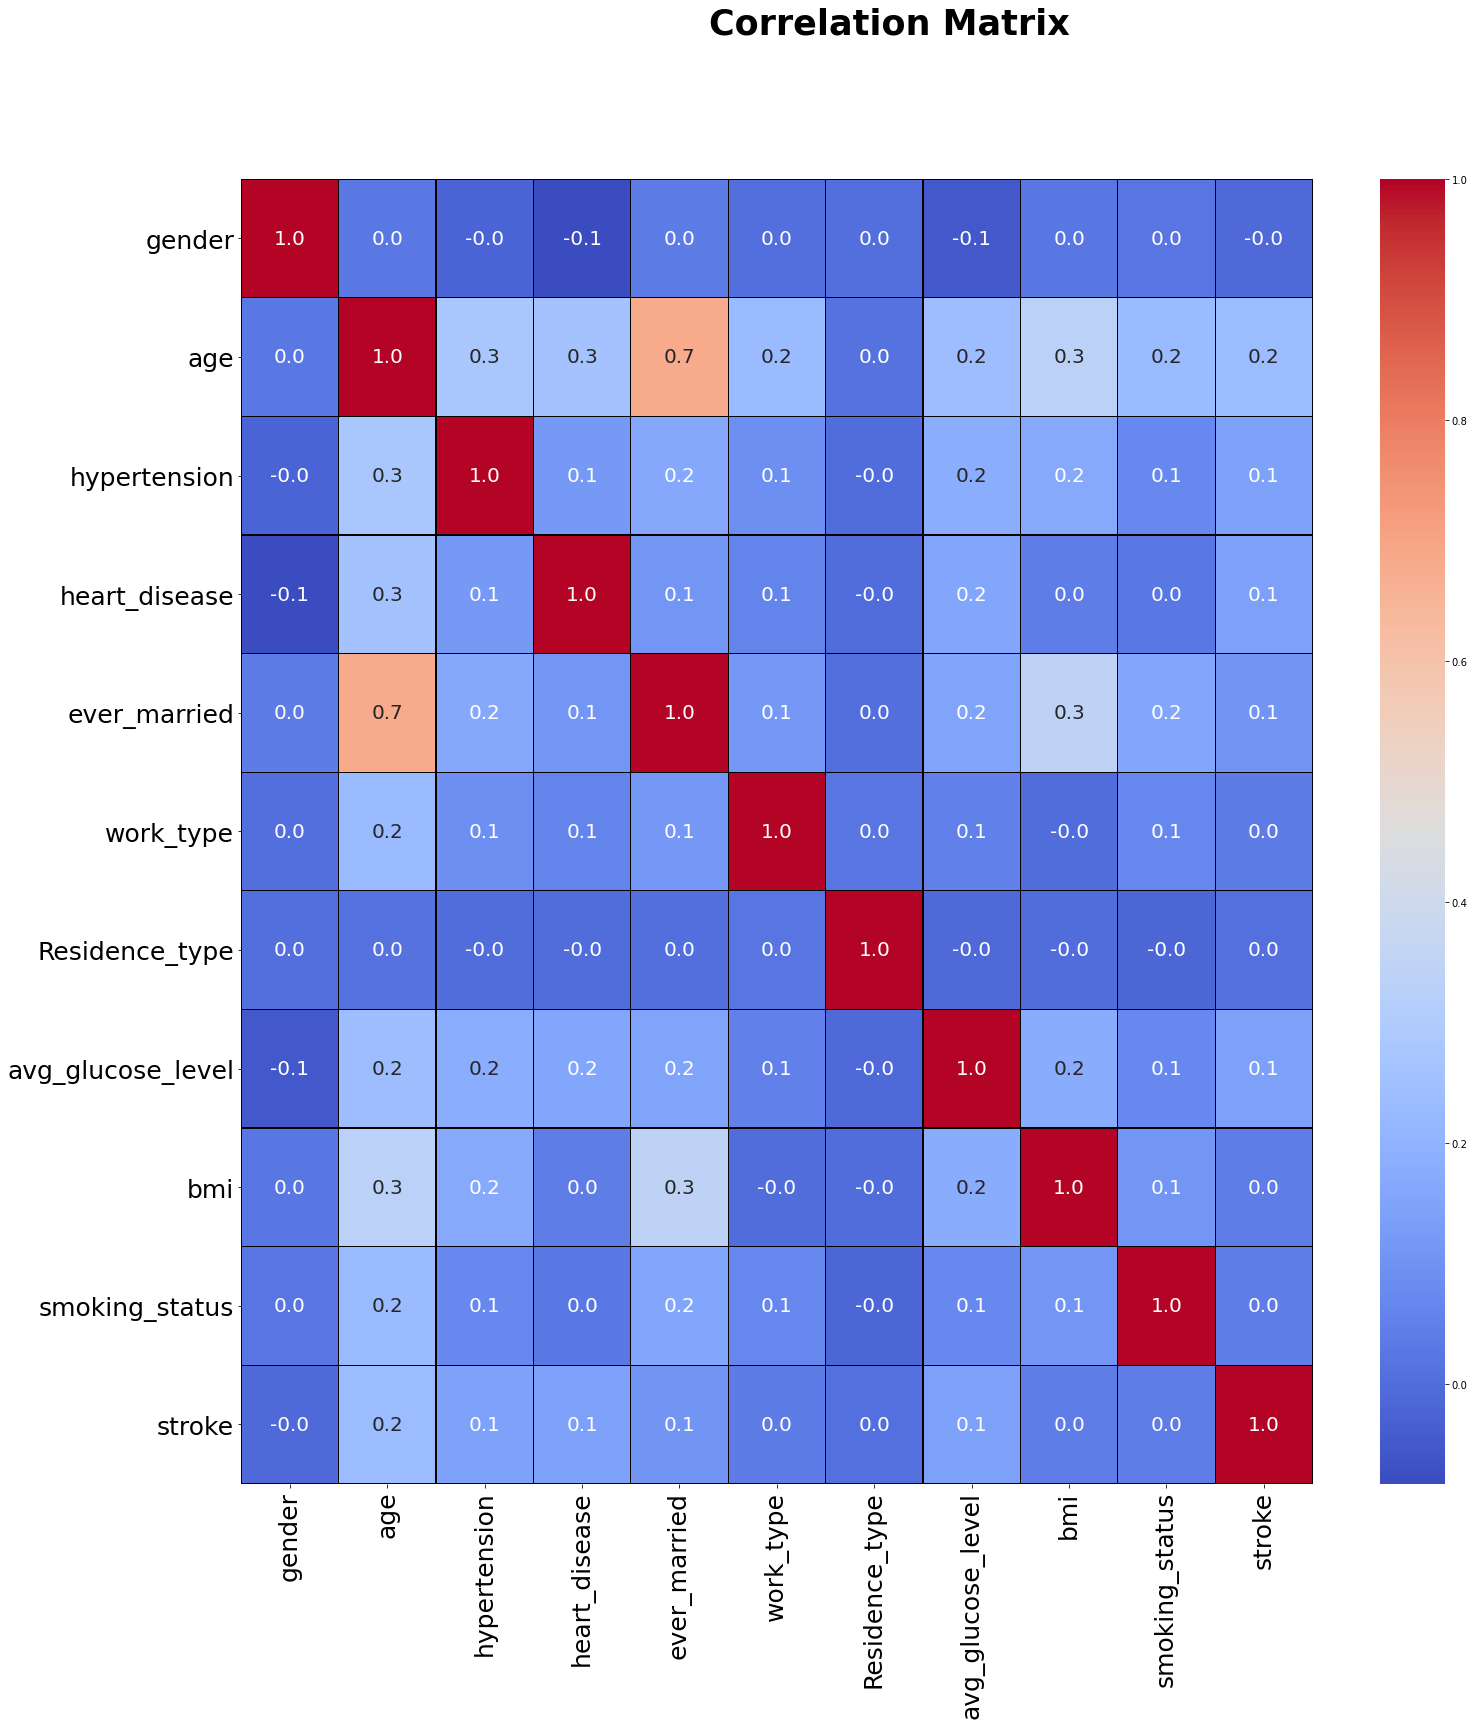

In [12]:
fig6 = plt.figure(figsize = (24, 24))
fig6.suptitle('Correlation Matrix', size=35, weight = 'bold')

sns.heatmap(strokedf.corr(), cmap = "coolwarm",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()


### From above correleation matrix, we can say that the variable are loosely correlated with each other.

### PAIRPLOT

PAIRPLOT


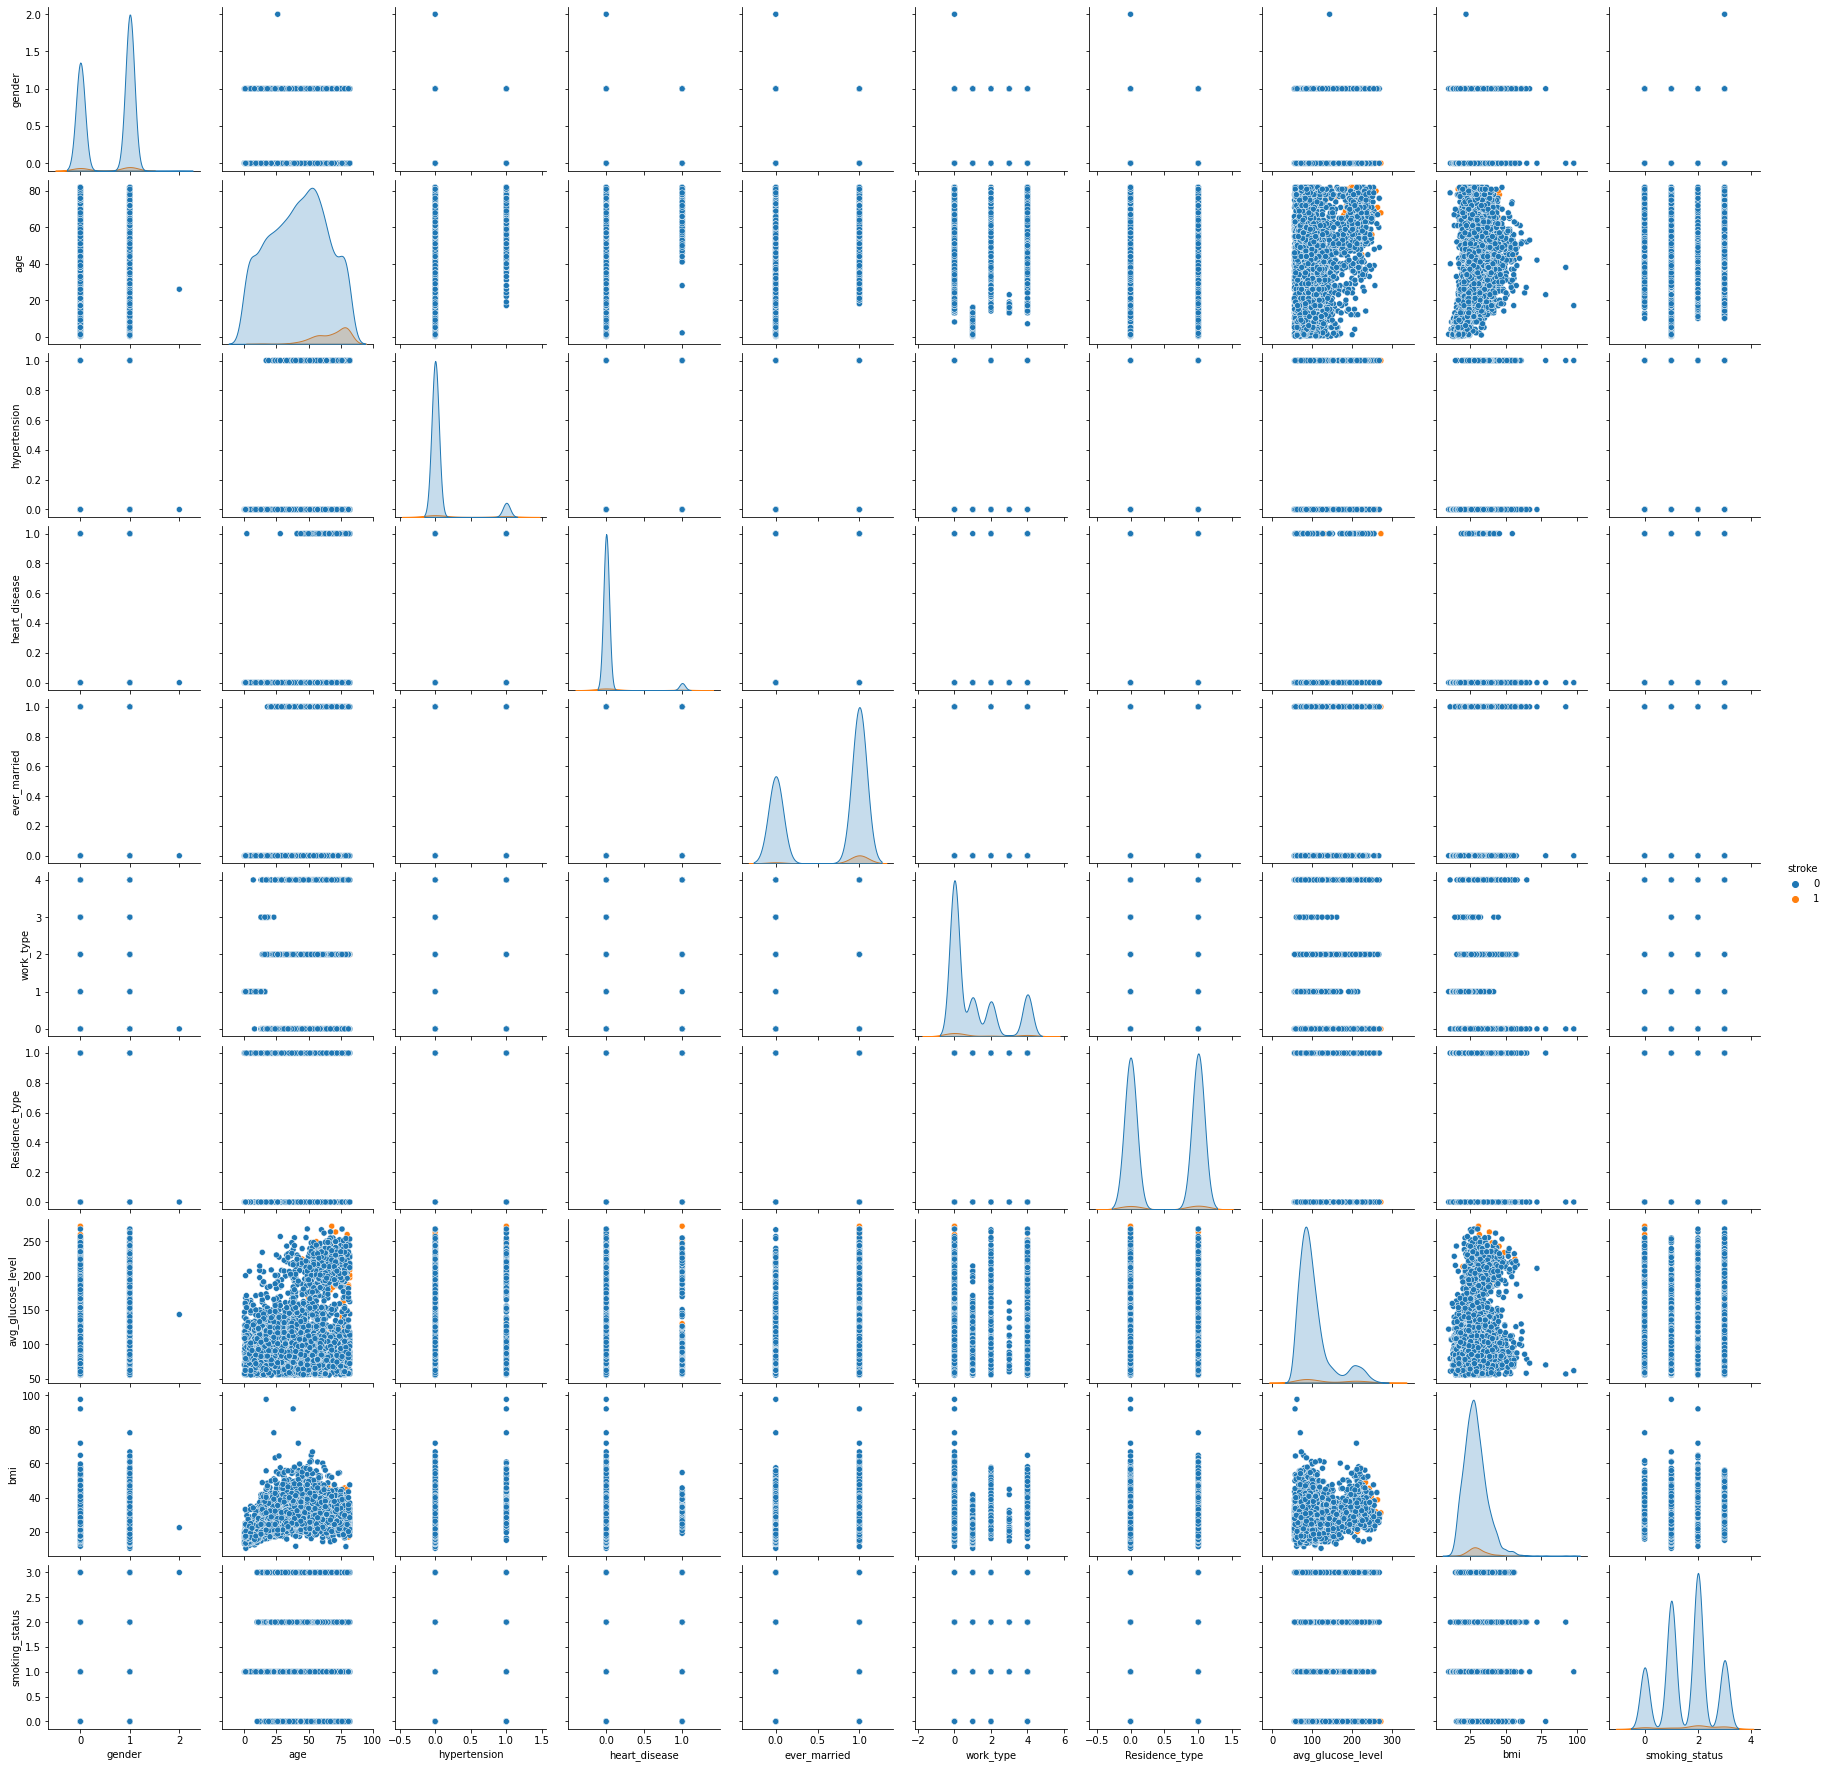

In [13]:
print('PAIRPLOT')
sns.pairplot(strokedf,vars=strokedf.columns[:-1], hue='stroke')
plt.show()

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>................................................................................................</strong></p>

# Applying different ML algorithms

### Resampling the data

In [14]:
maj_df = strokedf.loc[(strokedf['stroke']==0)]
min_df = strokedf.loc[(strokedf['stroke']==1)]

maj_knn = resample(maj_df, replace = False, n_samples = 3500)
min_knn = resample(min_df, replace = True, n_samples = 1000)

stroke_samp = pd.concat([maj_knn,min_knn])

### Splitting the dataset into train and test data

In [15]:
X = stroke_samp.drop(['stroke'], axis = 1) 
y = stroke_samp['stroke']

# splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)



In [16]:
# A function to calculate scores and confusion matrix.

def scores( y_test, y_preds):
    accuracy = round(accuracy_score(y_test, y_preds) * 100,3) 
    recall = round(recall_score(y_test, y_preds) * 100,3)
    precision = round(precision_score(y_test, y_preds) * 100,3) 
    f1 = round(f1_score(y_test, y_preds) * 100,3) 
    cm = confusion_matrix(y_test, y_preds)
    cmdf = pd.DataFrame(cm, columns = ['Stroke:No-P', 'Stroke:Yes-P' ], 
                      index = ['Stroke:No-A', 'Stroke:Yes-A' ] )
    
    
    score_set = [accuracy,recall,precision,f1]

    print(f'accuracy: {accuracy} %')
    print(f'recall: {recall} %')
    print(f'precision: {precision} %')
    print(f'f1: {f1} %\n')
    print('--'*40,f'\nClassification Report:\n{classification_report(y_test, y_preds)}\n' + '--' * 40)
    
    sns.heatmap(cmdf,annot = True, annot_kws = {'fontsize':15}, fmt = 'g',cmap = 'Blues')
    plt.suptitle('Confusion Matrix', size = 15)  
    plt.show()
#     plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
#     plt.show()
    return score_set

# 1.) Classification using KNN Algorithm

In [17]:
def euclidean_dist(train, sample): # function for calculating distances from a test sample to all the trainging samples
    distances = []
    for item in train:
        distances.append(np.linalg.norm(item - sample))
    return np.array(distances)

#################################################################################
    
def knn_class(train_f, train_l, test , k = 5):
    predictions = [] # empty list for predictions
    
    for sample in test:
        distances = euclidean_dist(train_f, sample)
        indx = np.argsort(distances) # getting indices of neighbours
        
        neighbours = [] # empty list for storing neighbours
        
        for i in range(k):
            neighbours.append(train_l[indx[i]])
        
        x = 0
        y = 0
        for item in neighbours: # claculating votes of each class in the K neighbours
            if item == 0:
                x = x + 1
            elif item == 1:
                y = y + 1
                
        predclass = np.argmax(np.array([x,y])) # predicting maximum voted class
        predictions.append(predclass) # storing predictions
    return np.array(predictions)


def stats(k, test, test_lab):
    preds = knn_class(X_train.to_numpy(), y_train.to_numpy(), test, k ) # predictions for different values of K
    data = [[0,0],[0,0]]
    
    for i in range(len(preds)):      # Creating Confusion Matrices for different values of K
        if test_lab[i] == 0 and preds[i] == 0:
            data[0][0] = data[0][0] + 1
        elif test_lab[i] == 0 and preds[i] == 1:
            data[0][1] = data[0][1] + 1
        elif test_lab[i] == 1 and preds[i] == 0:
            data[1][0] = data[1][0] + 1
        elif test_lab[i] == 1 and preds[i] == 1:
            data[1][1] = data[1][1] + 1
                      
    matrix = np.array(data) 
    accuracy = np.trace(matrix) / matrix.sum() * 100 # Calculating accuracy
    
#   creating data frame of confusion matrix
    df = pd.DataFrame(data, columns = ['Stroke:No-P', 'Stroke:Yes-P' ], 
                      index = ['Stroke:No-A', 'Stroke:Yes-A' ] )
                      
    return k, df, round(accuracy,3), preds

### Testing the model on test data for different values of K

In [18]:
klst = list(range(1,10,2))
accuracy = []
acc_train = []
for k in klst:
    accuracy.append(stats(k, X_test.to_numpy(), y_test.to_numpy())[2])
#     acc_train.append(stats(k, X_train.to_numpy(), y_train.to_numpy())[2])

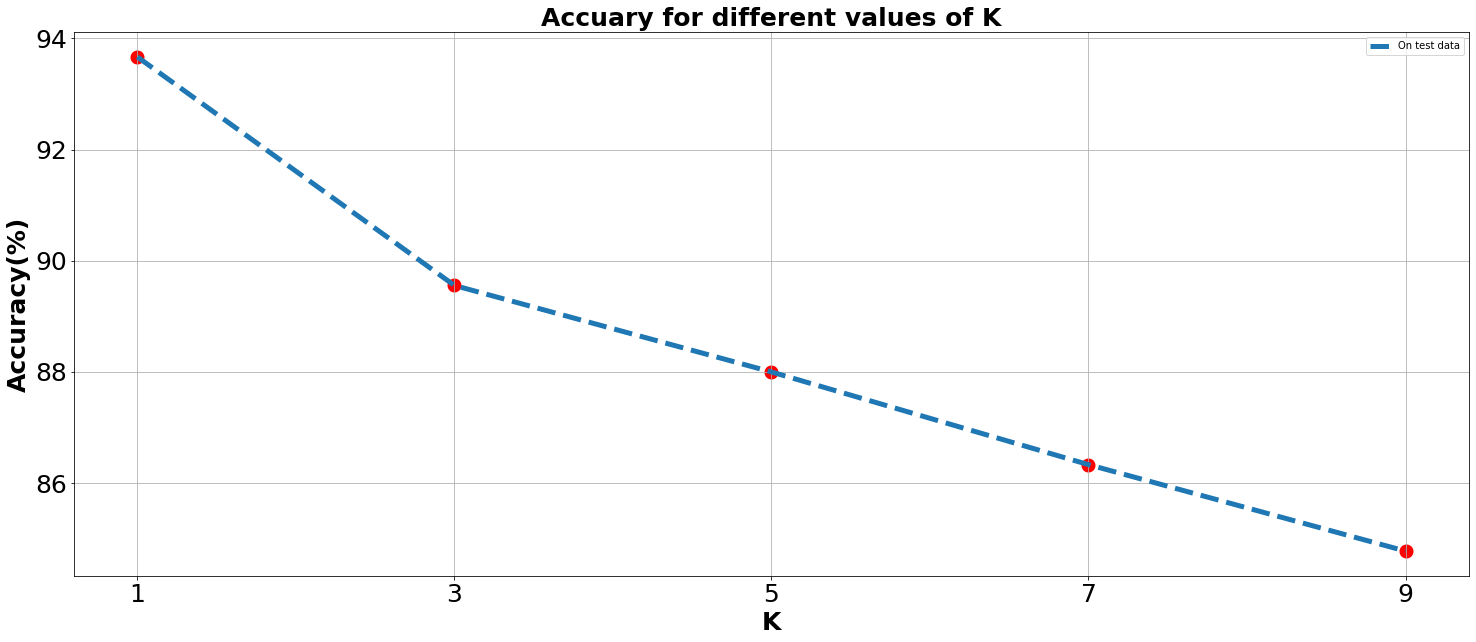

In [19]:
fig7 = plt.figure(figsize=(25,10))
ax5 = fig7.add_subplot(111)
ax5.plot(klst,accuracy, label = 'On test data',lw = 5, linestyle = '--', )
ax5.scatter(klst,accuracy,color = 'r',lw = 8)
# ax5.plot(klst,acc_train, label = 'on train data')
ax5.set_title('Accuary for different values of K', size = 25, weight = 'bold')
ax5.set_xlabel('K', size = 25, weight = 'bold')
ax5.set_ylabel(fr'Accuracy(%)', size = 25, weight = 'bold')
ax5.set_xticks(klst)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax5.grid()
ax5.legend()
plt.show()

### Results for Optimum value of K

Optimum value of K: 1

accuracy: 93.667 %
recall: 98.387 %
precision: 77.215 %
f1: 86.525 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       714
           1       0.77      0.98      0.87       186

    accuracy                           0.94       900
   macro avg       0.88      0.95      0.91       900
weighted avg       0.95      0.94      0.94       900

--------------------------------------------------------------------------------


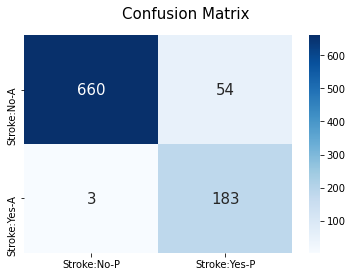

In [20]:
k_opt = klst[np.argmax(np.array(accuracy))]
k, cm, acc_max, max_preds = stats(k_opt, X_test.to_numpy(), y_test.to_numpy())
print(f'Optimum value of K: {k_opt}\n')
KNN_score = scores(y_test, max_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# 2.) Classification using Decision Tree Algorithm

accuracy: 94.444 %
recall: 98.387 %
precision: 79.565 %
f1: 87.981 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       714
           1       0.80      0.98      0.88       186

    accuracy                           0.94       900
   macro avg       0.90      0.96      0.92       900
weighted avg       0.95      0.94      0.95       900

--------------------------------------------------------------------------------


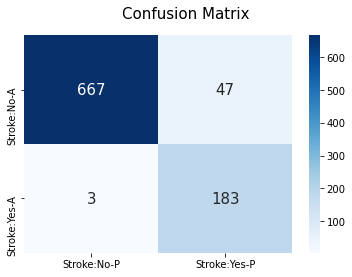

In [21]:
model_dct = DecisionTreeClassifier()
model_dct.fit(X_train, y_train)
dct_preds = model_dct.predict(X_test)
dct_score = scores(y_test,dct_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# 3.) Classification using Logistic Regression

accuracy: 73.333 %
recall: 79.57 %
precision: 42.286 %
f1: 55.224 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       714
           1       0.42      0.80      0.55       186

    accuracy                           0.73       900
   macro avg       0.68      0.76      0.68       900
weighted avg       0.83      0.73      0.76       900

--------------------------------------------------------------------------------


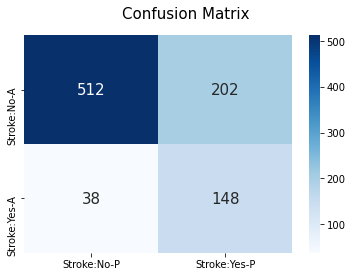

In [22]:
def sigmoid(x): # sigmoid function
    return 1/(1+np.exp(-1 * x))

def logreg(X, y, learn_rate, itr): # function for logistic regression
    
    m = X.shape[1] # number of samples
    n = X.shape[0] # number of features
    w = np.zeros((n, 1)) # initial weights
    b = 0 # initial bias
    costlist = []
    
    for i in range(itr):  # performing iterations for gradient descent
        z = np.dot(w.T, X) + b
        a = sigmoid(z)
        
        cost = (-1 / m) * np.sum(y * np.log(a) + (1-y)*np.log(1-a)) # cost function
        
        dw = (1/m)*np.dot(a-y, X.T) # partial diff wrt w
        db = (1/m) * np.sum(a-y) # partial diff wrt b
        
        # updating w and b
        w = w - learn_rate*dw.T 
        b = b - learn_rate*db
        
        costlist.append(cost)
        
    return w, b

def ypreds(test):
    a = sigmoid(np.dot(w.T,test.T) + b)
    
    y_preds = []
    for val in a[0]:
        if val>0.5:
            y_preds.append(1)
        else:
            y_preds.append(0)
    return y_preds

w,b = logreg(X_train.T, y_train.to_numpy().T, 0.001101513, 100000)

y_preds = ypreds(X_test)
logreg_score = scores(y_test, y_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# 4.) Classification using SVM Algorithm

accuracy: 81.0 %
recall: 25.806 %
precision: 59.259 %
f1: 35.955 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       714
           1       0.59      0.26      0.36       186

    accuracy                           0.81       900
   macro avg       0.71      0.61      0.62       900
weighted avg       0.78      0.81      0.78       900

--------------------------------------------------------------------------------


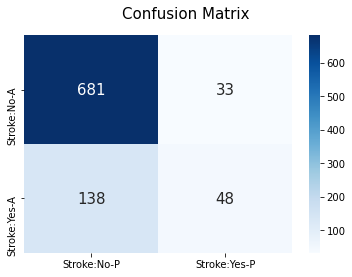

In [23]:
model_svc = SVC(C = 1, kernel = 'rbf')
model_svc.fit(X_train, y_train)
svm_preds = model_svc.predict(X_test)
svc_score = scores(y_test,svm_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# Comparison 

In [24]:
score_names = ['accuracy','recall','precision','f1 score']
all_score = [KNN_score , dct_score, logreg_score, svc_score]
score_df = pd.DataFrame(all_score, columns = score_names,
                       index = ['KNN','DecisionTree','Logistic Regression','SVM'])
score_df.style.highlight_max(color = 'orange', axis = 0)

# display(score_df)

,accuracy,recall,precision,f1 score
KNN,93.667000,98.387000,77.215000,86.525000
DecisionTree,94.444000,98.387000,79.565000,87.981000
Logistic Regression,73.333000,79.570000,42.286000,55.224000
SVM,81.000000,25.806000,59.259000,35.955000
